In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from wordcloud import WordCloud


%matplotlib inline

In [186]:
# Analisis Exploratorio de Datos

# La columna 'popularity', contiene valores de diferentes tipos de datos, se coloca str para los lea como cadenas de texto

data = pd.read_csv('df.csv', dtype={'popularity': str}) 
data.head(5)

,Unnamed: 0,budget,id,original_language,overview,popularity,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,collection_name,genre_names,release_year,return,production_countries_names,production_companies_names
0,0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,English,Released,NaN,Toy Story,7.7,Toy Story Collection,Animation|Comedy|Family,1995.0,12.45,United States of America,Pixar Animation Studios
1,1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,English|Français,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,NaN,Adventure|Fantasy|Family,1995.0,4.04,United States of America,TriStar Pictures|Teitler Film|Interscope Commu...
2,2,0.0,15602,en,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,English,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,Grumpy Old Men Collection,Romance|Comedy,1995.0,0.00,United States of America,Warner Bros.|Lancaster Gate
3,3,16000000.0,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,English,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,NaN,Comedy|Drama|Romance,1995.0,5.09,United States of America,Twentieth Century Fox Film Corporation
4,4,0.0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,English,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,Father of the Bride Collection,Comedy,1995.0,0.00,United States of America,Sandollar Productions|Touchstone Pictures


In [187]:
data.shape

(45466, 20)

In [188]:
data.describe()

,Unnamed: 0,budget,revenue,runtime,vote_average,release_year,return
count,45466.000000,4.546300e+04,4.546600e+04,45203.000000,45460.000000,45376.000000,4.546600e+04
mean,22732.500000,4.224579e+06,1.120787e+07,94.128199,5.618207,1991.881193,6.587362e+02
std,13125.048006,1.742413e+07,6.432813e+07,38.407810,1.924216,24.055360,7.461933e+04
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1874.000000,0.000000e+00
25%,11366.250000,0.000000e+00,0.000000e+00,85.000000,5.000000,1978.000000,0.000000e+00
50%,22732.500000,0.000000e+00,0.000000e+00,95.000000,6.000000,2001.000000,0.000000e+00
75%,34098.750000,0.000000e+00,0.000000e+00,107.000000,6.800000,2010.000000,0.000000e+00
max,45465.000000,3.800000e+08,2.787965e+09,1256.000000,10.000000,2020.000000,1.239638e+07


In [189]:
data.shape

(45466, 20)

In [190]:
# Miramos los tipos de datos que tenemos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  45466 non-null  int64  
 1   budget                      45463 non-null  float64
 2   id                          45466 non-null  object 
 3   original_language           45455 non-null  object 
 4   overview                    44512 non-null  object 
 5   popularity                  45461 non-null  object 
 6   release_date                45466 non-null  object 
 7   revenue                     45466 non-null  float64
 8   runtime                     45203 non-null  float64
 9   spoken_languages            41514 non-null  object 
 10  status                      45379 non-null  object 
 11  tagline                     20412 non-null  object 
 12  title                       45460 non-null  object 
 13  vote_average                454

In [191]:
data.isnull().sum()

Unnamed: 0                        0
budget                            3
id                                0
original_language                11
overview                        954
popularity                        5
release_date                      0
revenue                           0
runtime                         263
spoken_languages               3952
status                           87
tagline                       25054
title                             6
vote_average                      6
collection_name               42298
genre_names                    2442
release_year                     90
return                            0
production_countries_names        0
production_companies_names        0
dtype: int64

In [192]:
# Miramos si hay valores duplicados

duplicados = data.duplicated()
print("Número de filas duplicadas:", duplicados.sum())


Número de filas duplicadas: 0


In [193]:
genres = data["genre_names"].dropna().str.split(",", expand=True).unstack().value_counts()

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  45466 non-null  int64  
 1   budget                      45463 non-null  float64
 2   id                          45466 non-null  object 
 3   original_language           45455 non-null  object 
 4   overview                    44512 non-null  object 
 5   popularity                  45461 non-null  object 
 6   release_date                45466 non-null  object 
 7   revenue                     45466 non-null  float64
 8   runtime                     45203 non-null  float64
 9   spoken_languages            41514 non-null  object 
 10  status                      45379 non-null  object 
 11  tagline                     20412 non-null  object 
 12  title                       45460 non-null  object 
 13  vote_average                454

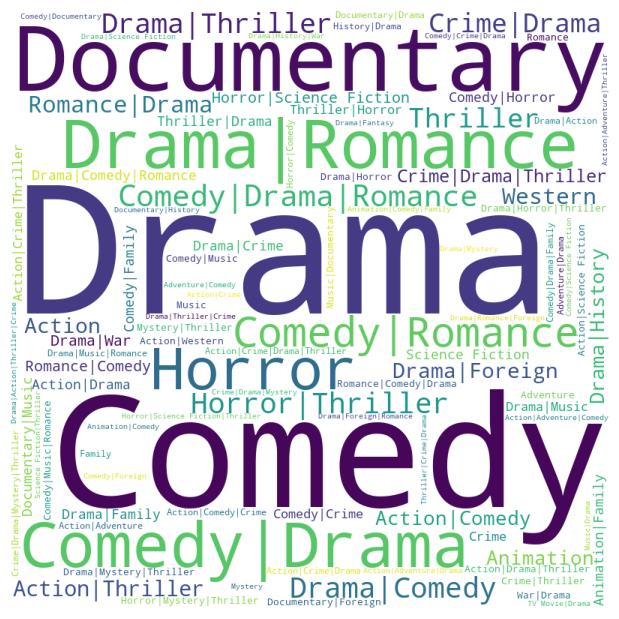

In [195]:
# Esta nube de palabras nos muestra los géneros más comunes en nuestro conjunto de datos.

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(genres)

plt.figure(figsize=(6, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


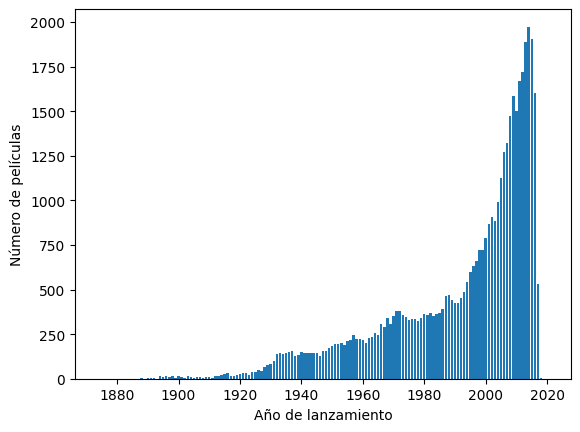

In [196]:

# Contar el número de películas por año
movies_by_year = data['release_year'].value_counts().sort_index()

# Crear el gráfico de barras
plt.bar(movies_by_year.index, movies_by_year.values)
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de películas')
plt.show()


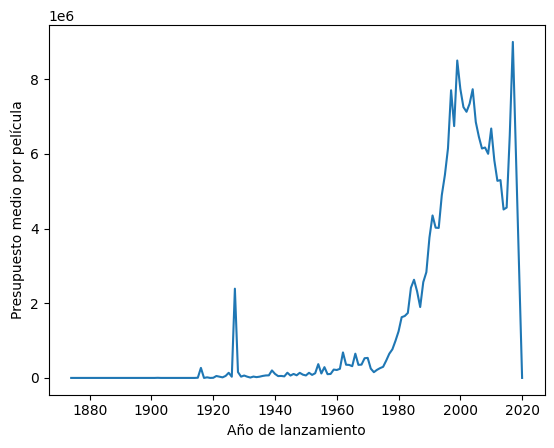

In [197]:
# Agrupar los datos por año y sumar los presupuestos
budget_by_year = data.groupby('release_year')['budget'].sum()

# Contar el número de películas por año
movies_by_year = data['release_year'].value_counts().sort_index()

# Crear el gráfico de línea
plt.plot(budget_by_year.index, budget_by_year.values / movies_by_year.values)
plt.xlabel('Año de lanzamiento')
plt.ylabel('Presupuesto medio por película')
plt.show()


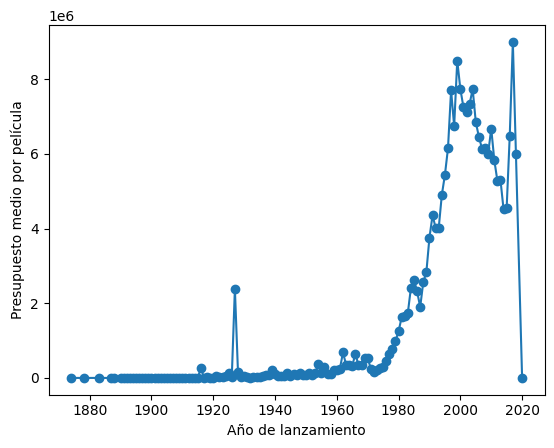

In [198]:
# Agrupar los datos por año y sumar los presupuestos
budget_by_year = data.groupby('release_year')['budget'].sum()

# Contar el número de películas por año
movies_by_year = data['release_year'].value_counts().sort_index()

# Crear el gráfico de línea
plt.plot(budget_by_year.index, budget_by_year.values / movies_by_year.values, marker='o')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Presupuesto medio por película')
plt.show()


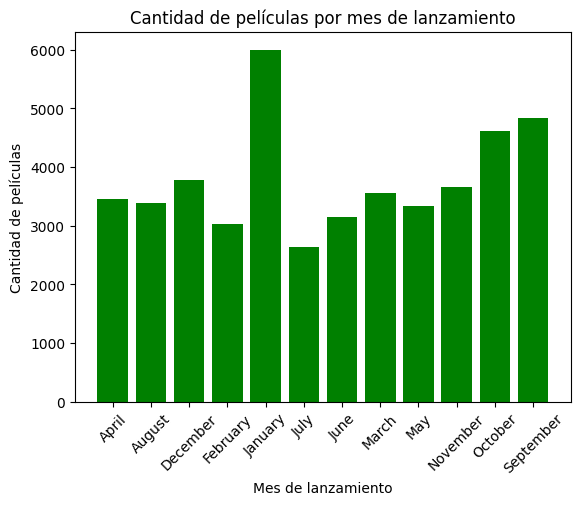

In [199]:
# Convertir la columna de fecha de lanzamiento a formato datetime
data['release_date'] = pd.to_datetime(data['release_date'])

# Crear una nueva columna con el mes de lanzamiento
data['release_month'] = data['release_date'].dt.month_name()

# Contar el número de películas por mes
movies_by_month = data['release_month'].value_counts().sort_index()

# Crear el gráfico de barras
plt.bar(movies_by_month.index, movies_by_month.values, color='green')
plt.xticks(rotation=45)
plt.xlabel('Mes de lanzamiento')
plt.ylabel('Cantidad de películas')
plt.title('Cantidad de películas por mes de lanzamiento')
plt.show()


In [200]:
print(data['release_date'].dtype) 

datetime64[ns]


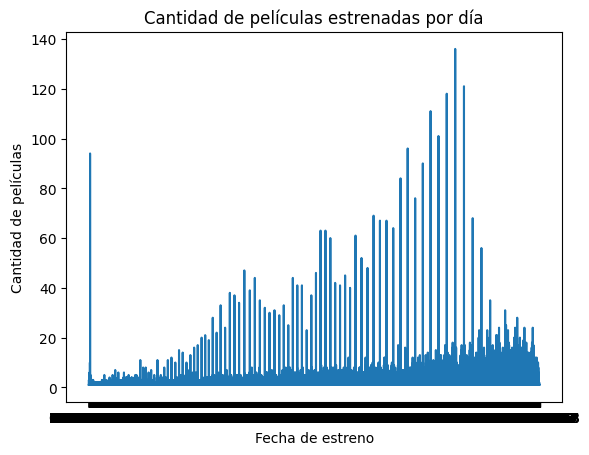

In [201]:
# Convertir la columna de fecha de lanzamiento a formato datetime
data['release_date'] = pd.to_datetime(data['release_date'])

# Obtener la frecuencia de películas por día
freq = data['release_date'].dt.date.value_counts().sort_index()

# Convertir el índice de freq a un objeto DatetimeIndex
freq.index = pd.DatetimeIndex(freq.index)

# Graficar los resultados
fig, ax = plt.subplots()
ax.plot(freq.index.strftime('%d-%m-%Y'), freq.values)
ax.set_xlabel('Fecha de estreno')
ax.set_ylabel('Cantidad de películas')
ax.set_title('Cantidad de películas estrenadas por día')
plt.show()


In [202]:
# Verificar valores NaN en la columna 'title'
print(data['title'].isna().sum())

# Verificar valores NaN en la columna 'budget'
print(data['budget'].isna().sum())

6
3


In [ ]:
nan_rows = data[data[['title']].isna().any(axis=1)]
print(nan_rows)


In [ ]:
nan_rows = data[data[['budget']].isna().any(axis=1)]
print(nan_rows)

In [207]:
budget_mean = data['budget'].mean()
data['budget'] = data['budget'].fillna(budget_mean)


In [208]:
# Verificar valores NaN en la columna 'budget'
print(data['budget'].isna().sum())

0


In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  45466 non-null  int64         
 1   budget                      45466 non-null  float64       
 2   id                          45466 non-null  object        
 3   original_language           45455 non-null  object        
 4   overview                    44512 non-null  object        
 5   popularity                  45461 non-null  object        
 6   release_date                45466 non-null  datetime64[ns]
 7   revenue                     45466 non-null  float64       
 8   runtime                     45203 non-null  float64       
 9   spoken_languages            41514 non-null  object        
 10  status                      45379 non-null  object        
 11  tagline                     20412 non-null  object    

In [215]:
# create a Boolean mask to identify NaN values
nan_mask = data['genre_names'].isna()

# use the Boolean mask to index the DataFrame and see the NaN values in the 'genre_names' column
nan_values = data[nan_mask]['genre_names']
print(nan_values)

55       NaN
83       NaN
126      NaN
137      NaN
390      NaN
        ... 
45447    NaN
45448    NaN
45455    NaN
45464    NaN
45465    NaN
Name: genre_names, Length: 2442, dtype: object
